# method 1

In [1]:
# # -*- coding:utf-8 -*-
# # @Time       :12/29/2021 2:50 PM
# # @AUTHOR     :Mengfei Yuan


# import numpy as np
# from scipy.special import binom
# import matplotlib.pyplot as plt


# bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

# def bezier(points, num=200):
#     N = len(points)
#     t = np.linspace(0, 1, num=num)
#     curve = np.zeros((num, 2))
#     for i in range(N):
#         curve += np.outer(bernstein(N - 1, i, t), points[i])
#     return curve

# class Segment():
#     def __init__(self, p1, p2, angle1, angle2, **kw):
#         self.p1 = p1; self.p2 = p2
#         self.angle1 = angle1; self.angle2 = angle2
#         self.numpoints = kw.get("numpoints", 100)
#         r = kw.get("r", 0.3)
#         d = np.sqrt(np.sum((self.p2-self.p1)**2))
#         self.r = r*d
#         self.p = np.zeros((4,2))
#         self.p[0,:] = self.p1[:]
#         self.p[3,:] = self.p2[:]
#         self.calc_intermediate_points(self.r)

#     def calc_intermediate_points(self,r):
#         self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
#                                     self.r*np.sin(self.angle1)])
#         self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
#                                     self.r*np.sin(self.angle2+np.pi)])
#         self.curve = bezier(self.p,self.numpoints)


# def get_curve(points, **kw):
#     segments = []
#     for i in range(len(points)-1):
#         seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
#         segments.append(seg)
#     curve = np.concatenate([s.curve for s in segments])
#     return segments, curve

# def ccw_sort(p):
#     d = p-np.mean(p,axis=0)
#     s = np.arctan2(d[:,0], d[:,1])
#     return p[np.argsort(s),:]

# def get_bezier_curve(a, rad=0.2, edgy=0):
#     """ given an array of points *a*, create a curve through
#     those points.
#     *rad* is a number between 0 and 1 to steer the distance of
#           control points.
#     *edgy* is a parameter which controls how "edgy" the curve is,
#            edgy=0 is smoothest."""
#     p = np.arctan(edgy)/np.pi+.5
#     a = ccw_sort(a)
#     a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
#     d = np.diff(a, axis=0)
#     ang = np.arctan2(d[:,1],d[:,0])
#     f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
#     ang = f(ang)
#     ang1 = ang
#     ang2 = np.roll(ang,1)
#     ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
#     ang = np.append(ang, [ang[0]])
#     a = np.append(a, np.atleast_2d(ang).T, axis=1)
#     s, c = get_curve(a, r=rad, method="var")
#     x,y = c.T
#     return x,y, a


# def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
#     """ create n random points in the unit square, which are *mindst*
#     apart, then scale them."""
#     mindst = mindst or 1.0/n
#     a = np.random.rand(n,2)
#     d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
#     if np.all(d >= mindst) or rec>=200:
#         return a*scale
#     else:
#         return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

# # if __name__ == "__main__":

In [2]:
# fig, ax = plt.subplots()
# ax.set_aspect("equal")

# rad = 0.1
# edgy = 0.5

# for c in np.array([[0, 0]]):  # ,
#     a = get_random_points(n=6, scale=1) + c
#     x, y, _ = get_bezier_curve(a, rad=rad, edgy=edgy)
#     plt.plot(x, y)
#     plt.xlim(0,1)
#     plt.ylim(0,1)
# plt.show()

In [3]:
# from turtle import Turtle, Screen

# class Star(Turtle):
#     def __init__(self, x=0, y=0):
#         super().__init__(visible=False)
#         self.speed('fastest')
#         self.draw_star(x, y)

#     def draw_star(self, x=0, y=0):
#         """ Creates the star shape """

#         self.penup()
#         self.setposition(x, y)
#         self.pendown()

#         self.fillcolor("red")

#         self.begin_fill()

#         for _ in range(9):
#             self.left(90)
#             self.forward(90)
#             self.right(130)
#             self.forward(90)

#         self.end_fill()

# t = Star()

# screen = Screen()
# screen.exitonclick()

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# def load_mnist(path):
#     """"""
#     data = np.load(path)
#     x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

#     x = np.concatenate((x_test, x_train))
#     y = np.concatenate((y_test, y_train))
#     x = x.reshape((x.shape[0], -1))
#     x = np.divide(x, 255.)
#     return x, y

# data_dir = '../'
# x, y = load_mnist(path=data_dir + 'mnist.npz')
# plt.imshow(x[0].reshape(28,28), cmap=plt.get_cmap('gray'))

# method 2 

In [1]:
# # -*- coding:utf-8 -*-
# # @Time       :12/29/2021 3:13 PM
# # @AUTHOR     :Mengfei Yuan

# import matplotlib.pyplot as plt
# from skimage.draw import random_shapes

# # Let's start simple and generate a 128x128 image
# # with a single grayscale rectangle.
# result = random_shapes((128, 128), max_shapes=1, shape='rectangle', random_seed=0)

# # We get back a tuple consisting of (1) the image with the generated shapes
# # and (2) a list of label tuples with the kind of shape (e.g. circle,
# # rectangle) and ((r0, r1), (c0, c1)) coordinates.
# image, labels = result
# print(f'Image shape: {image.shape}\nLabels: {labels}')

# # We can visualize the images.
# fig, axes = plt.subplots(nrows=2, ncols=3)
# ax = axes.ravel()
# ax[0].imshow(image, cmap='gray')
# ax[0].set_title('Grayscale shape')

# # The generated images can be much more complex. For example, let's try many
# # shapes of any color. If we want the colors to be particularly light, we can
# # set the `intensity_range` to an upper subrange of (0,255).
# image1, _ = random_shapes((128, 128), max_shapes=1,
#                           intensity_range=((100, 255),))

# plt.show()

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.draw import polygon


def limit_on_edge(x, img_size=28):
    edge_min = 1
    edge_max = img_size - 1
    x = max(edge_min, x)
    x = min(edge_max, x)
    return x

def img_diffusion(img_old):
    img = img_old.copy()
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] == 1.0 and random.uniform(0, 1) > 0.5:
                if img[r-1, c] == 0:
                    img[r, c] = random.uniform(0.5, 1)
                    img[r-1, c] = random.uniform(0, 0.5)
                elif img[r, c-1] == 0:
                    img[r, c] = random.uniform(0.5, 1)
                    img[r, c-1] = random.uniform(0, 0.5)
                elif img[r+1, c] == 0:
                    img[r, c] = random.uniform(0.5, 1)
                    img[r+1, c] = random.uniform(0, 0.5)
                elif img[r, c+1]==0:
                    img[r, c] = random.uniform(0.5, 1)
                    img[r, c+1] = random.uniform(0, 0.5)
    # plt.imshow(img, cmap=plt.get_cmap('gray'))
    return img
               

In [3]:

random_shapes = {
                 'tri_0': ([(6,6), (14,22), (22,6)], 3),
#                  'rec_0': ([(6,6), (6,22), (22,22), (22,6)], 4),
                 'rec_1': ([(12,6), (16,4), (16,24), (12,24)], (3, 3)),
                 'rec_2': ([(6,12), (4,16), (24,16), (24,12)], (3, 3)),
#                  'pentagon_0': ([(6,18), (10,8), (18,8), (22,18), (14,24)], 2),
#                  'hex_0': ([(14,6), (10,10), (10,20), (14,24), (20,20), (20,10)], 2),
                 'star_0': ([(5,14), (11,17), (14,23),(17,17), 
                             (23,14), (17,11), (14, 5), (11, 11)], 1),
                 'hourglass_0': ([(6,18), (10,8), (14,24), (22,18)], 2),
                }

# shape2class = {
#     'tri_0': 0,
#     'rec_0': 1,
#     'rec_1': 2,
#     'rec_2': 3,
#     'pentagon_0': 4,
#     'hex_0': 5,
#     'star_0': 6,
#     'hourglass_0': 7,
#     'ecllipse_0': 8,
#     'circle_0': 9
#                 }

shape2class = {
    'tri_0': 0,
    'rec_1': 1,
    'rec_2': 2,
    'star_0': 3,
    'hourglass_0': 4,
    'ecllipse_0': 5,
    'circle_0': 6
                }


number_sample = 2000
img_size = 28

shape2points_list = dict()
for shape in random_shapes:
    if shape.endswith('0'):
        points_list = []
        for num in range(number_sample):
            points, std = random_shapes[shape]
            points_new = []
            for x, y in points:
                random_number = random.randint(-std, std)
                x = limit_on_edge(x + random_number)
                y = limit_on_edge(y + random_number)
                points_new.append((x, y))
            points_list.append(points_new)
        
    else:
        points_list = []
        for num in range(number_sample):
            points, std = random_shapes[shape]
            points_new = []
            random_number_lr,  random_number_ud = random.randint(-std[0], std[0]), random.randint(-std[1], std[1])
            for x, y in points:
                x = limit_on_edge(x + random_number_lr)
                y = limit_on_edge(y + random_number_ud)
                points_new.append((x, y))
            points_list.append(points_new)
    shape2points_list[shape] = points_list

In [4]:
shape2vector = []
shape_class = 0
for shape in shape2points_list:
    points_list = shape2points_list[shape]
    
    # plt.figure(figsize=(10,6))
    for i in range(len(points_list)):
        img = np.zeros((img_size, img_size), dtype=np.uint8)
        points = points_list[i]
        r = np.array([x[0] for x in points])
        c = np.array([x[1] for x in points])
        rr, cc = polygon(r, c)
        img[rr, cc] = 1
        img = img.astype(np.float64)
        img = img_diffusion(img)
        
        vector = [shape2class[shape]] + img.reshape(img_size**2).tolist()
        shape2vector.append(vector)
        shape_class += 1
        
        # plt.subplot(2, 5, i+1)
        # plt.imshow(img, cmap=plt.get_cmap('gray'))
        # plt.suptitle(shape)

In [5]:
shape = 'ecllipse_0'
points = [14, 14, 5, 9]
std = 2

points_list = []
for num in range(number_sample):
    rr, cc, x, y = points
    random_number = random.randint(-std, std)
    rr = rr + random_number
    cc = cc + random_number
    x = x + random_number
    y = y + random_number
    points_new = rr, cc, x, y
    points_list.append(points_new)
print(points_list)

from skimage.draw import ellipse
# plt.figure(figsize=(10,6))

for i in range(len(points_list)):
    rotation_degree = 0 + random.randint(-90, 90)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    rr, cc, x, y = points_list[i]
    rr, cc = ellipse(rr, cc, x, y, rotation=np.deg2rad(rotation_degree))
    img[rr, cc] = 1
    img = img.astype(np.float64)
    img = img_diffusion(img)
    
    vector = [shape2class[shape]] + img.reshape(img_size**2).tolist()
    shape2vector.append(vector)
    
    # plt.subplot(2, 5, i+1)
    # plt.imshow(img, cmap=plt.get_cmap('gray'))


[(15, 15, 6, 10), (13, 13, 4, 8), (16, 16, 7, 11), (15, 15, 6, 10), (16, 16, 7, 11), (13, 13, 4, 8), (12, 12, 3, 7), (14, 14, 5, 9), (14, 14, 5, 9), (14, 14, 5, 9), (13, 13, 4, 8), (14, 14, 5, 9), (15, 15, 6, 10), (15, 15, 6, 10), (16, 16, 7, 11), (15, 15, 6, 10), (14, 14, 5, 9), (15, 15, 6, 10), (15, 15, 6, 10), (12, 12, 3, 7), (13, 13, 4, 8), (14, 14, 5, 9), (16, 16, 7, 11), (16, 16, 7, 11), (16, 16, 7, 11), (13, 13, 4, 8), (12, 12, 3, 7), (13, 13, 4, 8), (14, 14, 5, 9), (13, 13, 4, 8), (13, 13, 4, 8), (12, 12, 3, 7), (16, 16, 7, 11), (15, 15, 6, 10), (15, 15, 6, 10), (12, 12, 3, 7), (14, 14, 5, 9), (12, 12, 3, 7), (14, 14, 5, 9), (16, 16, 7, 11), (12, 12, 3, 7), (13, 13, 4, 8), (13, 13, 4, 8), (16, 16, 7, 11), (15, 15, 6, 10), (16, 16, 7, 11), (15, 15, 6, 10), (16, 16, 7, 11), (16, 16, 7, 11), (15, 15, 6, 10), (14, 14, 5, 9), (15, 15, 6, 10), (13, 13, 4, 8), (14, 14, 5, 9), (13, 13, 4, 8), (14, 14, 5, 9), (14, 14, 5, 9), (12, 12, 3, 7), (16, 16, 7, 11), (13, 13, 4, 8), (12, 12, 3, 7

In [6]:

shape = 'circle_0'
points = [14, 14, 6, 6]
std = 3

points_list = []
for num in range(number_sample):
    rr, cc, x, y = points
    random_number = random.randint(-std, std)
    rr = rr + random_number
    cc = cc + random_number
    x = x + random_number
    y = y + random_number
    points_new = rr, cc, x, y
    points_list.append(points_new)
print(points_list)

from skimage.draw import ellipse
# plt.figure(figsize=(10,6))

for i in range(len(points_list)):
    rotation_degree = 0 + random.randint(-90, 90)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    rr, cc, x, y = points_list[i]
    rr, cc = ellipse(rr, cc, x, y, rotation=np.deg2rad(rotation_degree))
    img[rr, cc] = 1
    img = img.astype(np.float64)
    img = img_diffusion(img)
    
    vector = [shape2class[shape]] + img.reshape(img_size**2).tolist()
    shape2vector.append(vector)
    
    # plt.subplot(2, 5, i+1)
    # plt.imshow(img, cmap=plt.get_cmap('gray'))


[(16, 16, 8, 8), (13, 13, 5, 5), (14, 14, 6, 6), (11, 11, 3, 3), (13, 13, 5, 5), (16, 16, 8, 8), (12, 12, 4, 4), (13, 13, 5, 5), (14, 14, 6, 6), (14, 14, 6, 6), (17, 17, 9, 9), (15, 15, 7, 7), (15, 15, 7, 7), (12, 12, 4, 4), (11, 11, 3, 3), (13, 13, 5, 5), (15, 15, 7, 7), (14, 14, 6, 6), (13, 13, 5, 5), (12, 12, 4, 4), (14, 14, 6, 6), (17, 17, 9, 9), (13, 13, 5, 5), (17, 17, 9, 9), (16, 16, 8, 8), (15, 15, 7, 7), (13, 13, 5, 5), (14, 14, 6, 6), (15, 15, 7, 7), (16, 16, 8, 8), (14, 14, 6, 6), (14, 14, 6, 6), (11, 11, 3, 3), (12, 12, 4, 4), (15, 15, 7, 7), (12, 12, 4, 4), (16, 16, 8, 8), (12, 12, 4, 4), (17, 17, 9, 9), (17, 17, 9, 9), (17, 17, 9, 9), (17, 17, 9, 9), (15, 15, 7, 7), (14, 14, 6, 6), (16, 16, 8, 8), (12, 12, 4, 4), (14, 14, 6, 6), (15, 15, 7, 7), (15, 15, 7, 7), (12, 12, 4, 4), (13, 13, 5, 5), (11, 11, 3, 3), (13, 13, 5, 5), (14, 14, 6, 6), (13, 13, 5, 5), (12, 12, 4, 4), (12, 12, 4, 4), (11, 11, 3, 3), (11, 11, 3, 3), (12, 12, 4, 4), (12, 12, 4, 4), (15, 15, 7, 7), (15, 15

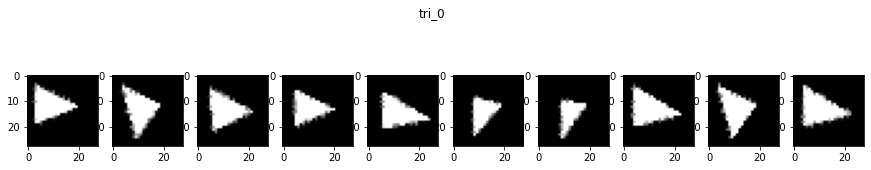

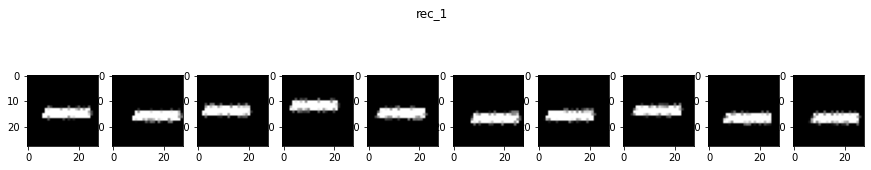

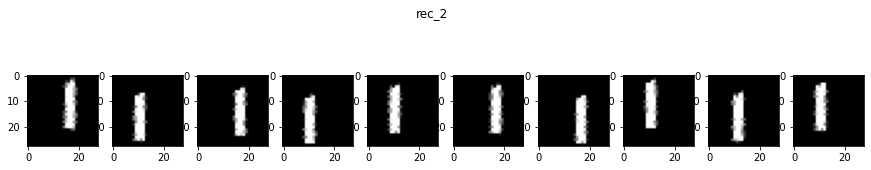

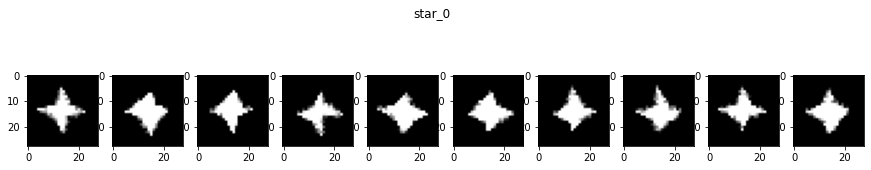

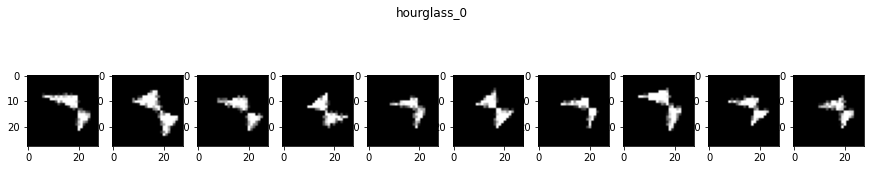

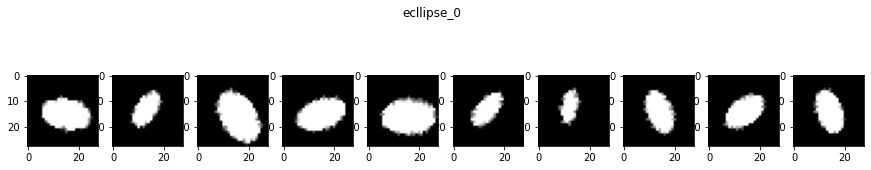

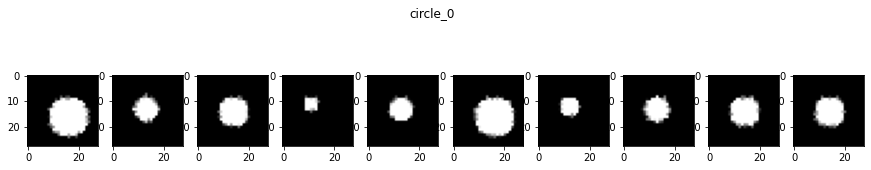

In [7]:
df = pd.DataFrame(shape2vector)
plot_sample = 10
number_sample = 2000


for shape in shape2class:
    plt.figure(figsize=(15,3))
    idx = 0
    for j in range(plot_sample):
        idx += 1
        img = df.iloc[shape2class[shape]*number_sample+j, 1:].values.reshape(img_size, img_size)
        
        plt.subplot(1, 10, idx)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        plt.suptitle(shape)

In [8]:
     
# img = df.iloc[shape2class[shape]*number_sample+j, 1:].values.reshape(img_size, img_size)
# img_diffused = img_diffusion(img)

In [9]:
df.to_csv('../random_shape_c7_s2000d_diffused.csv', header=None, index=False)

In [23]:
# 1. 怎么去评判，spinodal的parameter extraction是对的，就看他重新用FFT跑出来的spinodal跟原先的差多少，在topology上差别大不大。
# 2. 不要直接用图片来做VAE， 用TDA的参数来作为输入。
# 3. 就是生成同样的图片的意义是什么，是不是同样的性质，如果regenrate出来的虽然不一样，但是性质很想也可以

In [13]:
# df_not_diffused = pd.read_csv('../random_shape_c7_s1000.csv')

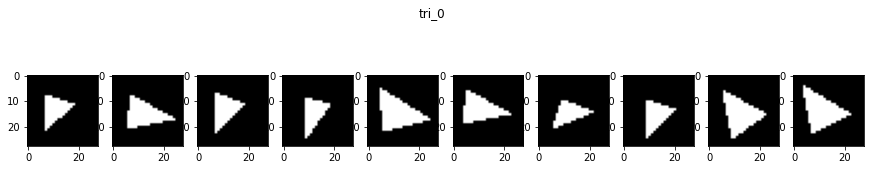

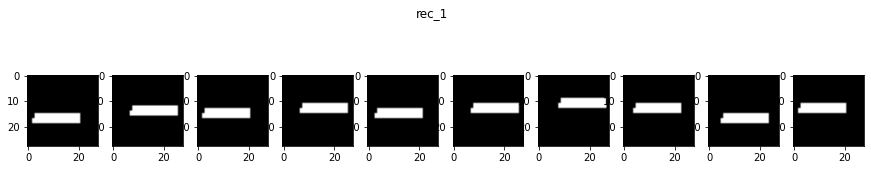

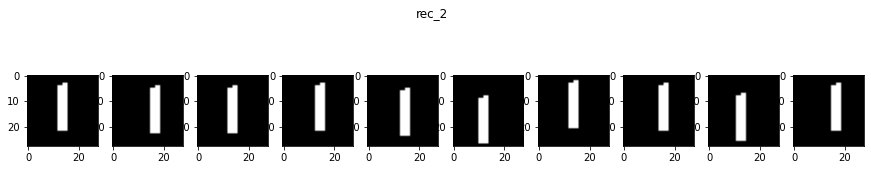

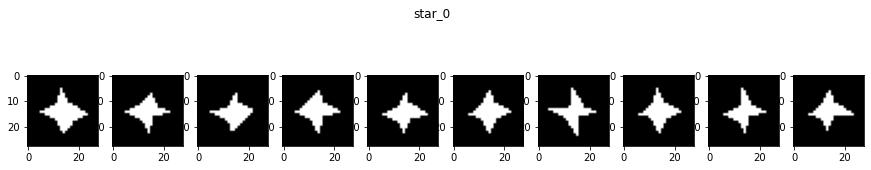

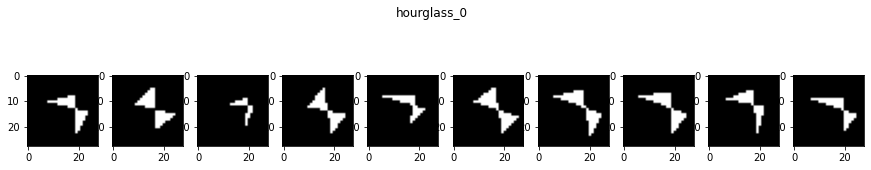

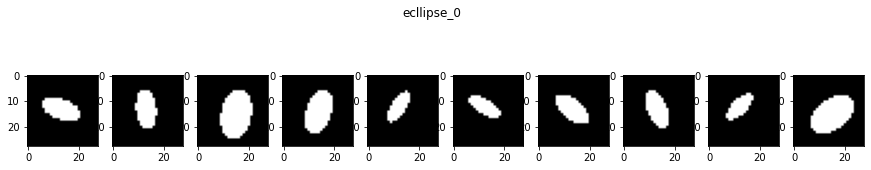

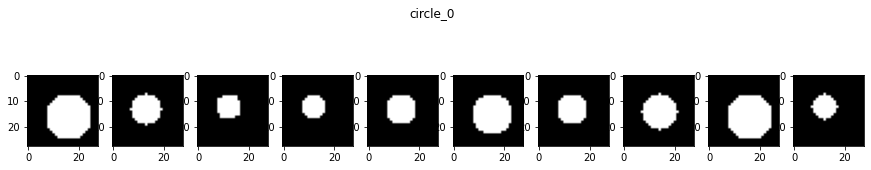

In [14]:
# plot_sample = 10
# number_sample = 1000


# for shape in shape2class:
#     plt.figure(figsize=(15,3))
#     idx = 0
#     for j in range(plot_sample):
#         idx += 1
#         img = df_not_diffused.iloc[shape2class[shape]*number_sample+j, 1:].values.reshape(img_size, img_size)
        
#         plt.subplot(1, 10, idx)
#         plt.imshow(img, cmap=plt.get_cmap('gray'))
#         plt.suptitle(shape)